<h1 align="center">ECE 9309 </h1>
<h2 align="center">Course Project -- Plant Disease Sorting </h2>
<h2 align="center">Bryce Dudley,</h2>
<h2 align="center">Nicholas Mitchell,</h2>
<h2 align="center">Bo Shan,</h2>
<h2 align="center">Evan Simpson,</h2>
<h2 align="center">Department of Electrical and Computer Engineering</h2>
<h2 align="center">Western University</h2>
<h2 align="center">Date: No Idea Yet </h2>
<h2 align="center">Submitted to Dr. Shami</h2>

<h1 align="left">Image Preprocessing Nick Testing</h1>

In [1]:
# Do your includes 
# Include libraries that will be needed throughout the project for image processing

# Simple Insight Segmentation and Registration Toolkit
import SimpleITK as sitk

# Maltab plotting 
import matplotlib.pyplot as plt

# array manipulation 
import numpy as np

#Calculating block times 
import timeit

# good for calucating region properties for images (maybe needed later so I haven't deleted it) 
from skimage.measure import label , regionprops

#check to see if sitk is working 
print(sitk.Version())

SimpleITK Version: 1.2.3 (ITK 4.13)
Compiled: Oct 12 2019 17:33:22



In [2]:
# Define output filepath
filePath = "../../dataset/PlantVillage/RGB/Potato___Healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG"

# Read the Image 
testImage = sitk.ReadImage(filePath)

In [3]:
# transform the image into 4 seperate images; Red , Green, Blue and grayscale 
testArray = sitk.GetArrayFromImage(testImage)

# Proof that color channels are acting properly, uncomment to see
# testArray[0:10,0:10] = [255,0,0] # red
# testArray[0:10,0:10] = [0,255,0] # green
# testArray[0:10,0:10] = [0,0,255] # blue

# split the color channels
testArrayRed = testArray[:,:,0]
testArrayGreen = testArray[:,:,1]
testArrayBlue = testArray[:,:,2]

# Mimic Weighted Sum of your eye filters to get grayscale image
testArrayGrayscale = 0.299*testArrayRed + 0.587*testArrayGreen + 0.144*testArrayBlue


Text(0.5, 1.0, 'Grayscale Hist')

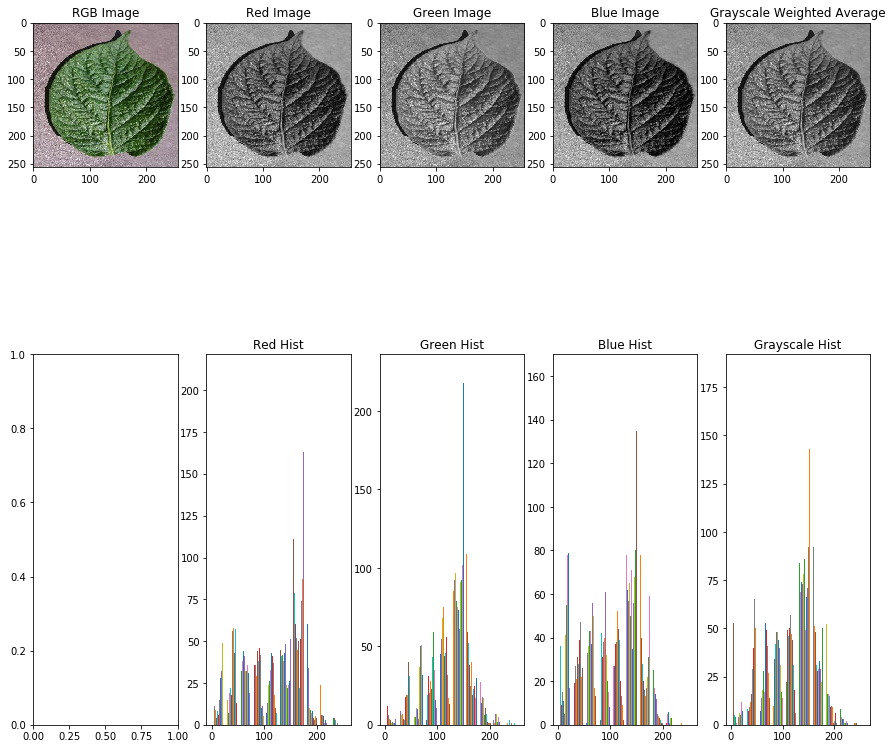

In [4]:
# Show the images 
plt.subplots(2,5,figsize=(15,15))

# display input image
plt.subplot(2,5,1)
plt.imshow(testArray,cmap='gray')
plt.title('RGB Image')

# display input image
plt.subplot(2,5,2)
plt.imshow(testArrayRed,cmap='gray')
plt.title('Red Image')

# display input image
plt.subplot(2,5,3)
plt.imshow(testArrayGreen,cmap='gray')
plt.title('Green Image')

# display input image
plt.subplot(2,5,4)
plt.imshow(testArrayBlue,cmap='gray')
plt.title('Blue Image')

# display input image
plt.subplot(2,5,5)
plt.imshow(testArrayGrayscale,cmap='gray')
plt.title('Grayscale Weighted Average')

# display input image
plt.subplot(2,5,7)
plt.hist(testArrayRed)
plt.title('Red Hist')

# display input image
plt.subplot(2,5,8)
plt.hist(testArrayGreen)
plt.title('Green Hist')

# display input image
plt.subplot(2,5,9)
plt.hist(testArrayBlue)
plt.title('Blue Hist')

# display input image
plt.subplot(2,5,10)
plt.hist(testArrayGrayscale)
plt.title('Grayscale Hist')

<h2 align="center">Which image is best for edge detection?</h2>
<p align="center">Personally I chose the blue band because it has the highest contrast (darkest + light regions are the most prominent)</p>

<h2 align="center">What sort of Segmentation based on thresholding will work</h2>
<p align="center">I think that i Kinda see binomial peaks so I will try otsu! </p>

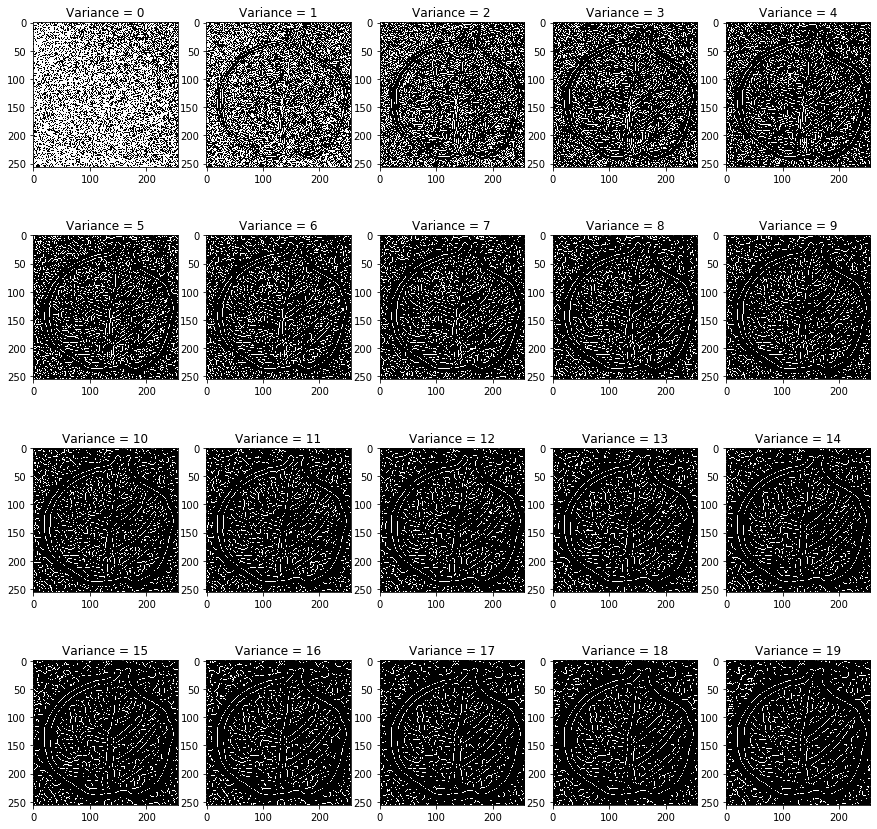

In [5]:
# Edge Detection Algorithm -- my preferred method is canny currently 
test = {} 

# make object
canny_filter = sitk.CannyEdgeDetectionImageFilter()  

# make matlab plots
plt.subplots(4,5,figsize=(15,15))

# note** canny takes image objects (also needs to be float not Unsigned integer) but plt.imshow takes numpy arrays. 
# Conversion is done in-line
# run canny edge detection with different "smoothening" parameters 
for variance in range (0,20):
    canny_filter.SetVariance(variance)
    # try it on grayscale converted object 
    test[variance] = canny_filter.Execute(sitk.Cast(sitk.GetImageFromArray(testArrayBlue),sitk.sitkFloat32))
    plt.subplot(4,5,variance+1)
    plt.imshow(sitk.GetArrayViewFromImage(test[variance]),cmap='gray')
    plt.title('Variance = ' + str(variance))

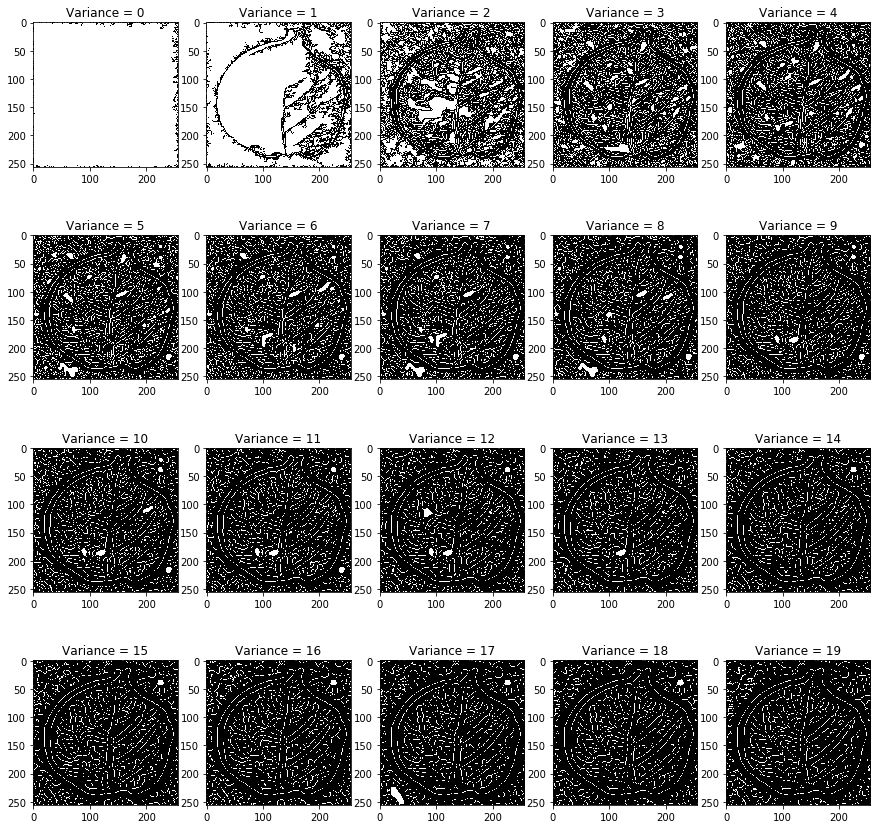

In [6]:
# use hole fill filter to try to get the image to binarize the leaf in it's entirety 
holeFillFilter = sitk.GrayscaleFillholeImageFilter()
holeFillFilter.FullyConnectedOff()

# make matlab plots
plt.subplots(4,5,figsize=(15,15))

hole = {}
for i in range (0,20):
    # try it on grayscale converted object 
    hole[i] = holeFillFilter.Execute(test[i])
    plt.subplot(4,5,i+1)
    plt.imshow(sitk.GetArrayViewFromImage(hole[i]),cmap='gray')
    plt.title('Variance = ' + str(i))

The Issue with the images is that there is not enough contrast against the background noise. Canny Edge detection doesn't seem like a reliable method to do segementation in this case :( 

Text(0.5, 1.0, 'Grayscale Otsu')

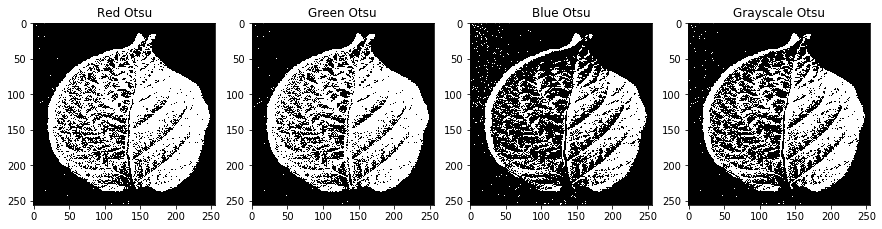

In [7]:
# let us try otsu filter 

otsu_filter = sitk.OtsuThresholdImageFilter() 
inside_value = 0 #set inside values to 1 
outside_value = 1 #set outside values to 0 

# Pass the values to the otsu filter
otsu_filter.SetInsideValue(inside_value) 
otsu_filter.SetOutsideValue(outside_value)

otsu = {}
# try it on grayscale converted object 
otsu[0] = ~otsu_filter.Execute(sitk.GetImageFromArray(testArrayRed))
otsu[1] = ~otsu_filter.Execute(sitk.GetImageFromArray(testArrayBlue))
otsu[2] = ~otsu_filter.Execute(sitk.GetImageFromArray(testArrayGreen))
otsu[3] = ~otsu_filter.Execute(sitk.GetImageFromArray(testArrayGrayscale))

# make matlab plots
plt.subplots(1,4,figsize=(15,15))

plt.subplot(1,4,1)
plt.imshow(sitk.GetArrayViewFromImage(otsu[0]),cmap='gray')
plt.title('Red Otsu')
           
plt.subplot(1,4,2)
plt.imshow(sitk.GetArrayViewFromImage(otsu[1]),cmap='gray')
plt.title('Green Otsu')

plt.subplot(1,4,3)
plt.imshow(sitk.GetArrayViewFromImage(otsu[2]),cmap='gray')
plt.title('Blue Otsu')

plt.subplot(1,4,4)
plt.imshow(sitk.GetArrayViewFromImage(otsu[3]),cmap='gray')
plt.title('Grayscale Otsu')

This output really isn't bad! But I am unsure if Red / green is better in this case! Also there is some issue with the shadow being inside the image still ... That is a later issue 

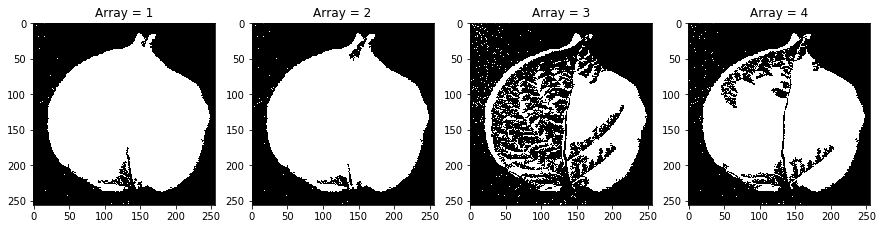

In [8]:
# use hole fill filter to try to get the image to binarize the leaf in it's entirety 
holeFillFilter = sitk.GrayscaleFillholeImageFilter()
holeFillFilter.FullyConnectedOff()

# make matlab plots
plt.subplots(1,4,figsize=(15,15))

hole2 = {}
for i in range (0,4):
    # try it on grayscale converted object 
    hole2[i] = holeFillFilter.Execute(otsu[i])
    plt.subplot(1,4,i+1)
    plt.imshow(sitk.GetArrayViewFromImage(hole2[i]),cmap='gray')
    plt.title('Array = ' + str(i+1))

Oddly enough my friend thought #1 and #2 look like an onion... he isn't wrong...
Anyway My next method will be to multiply the original image by this value, then find the centroid and region grow! (in order to not get that shadow in the way) 

visualizing the answers! 


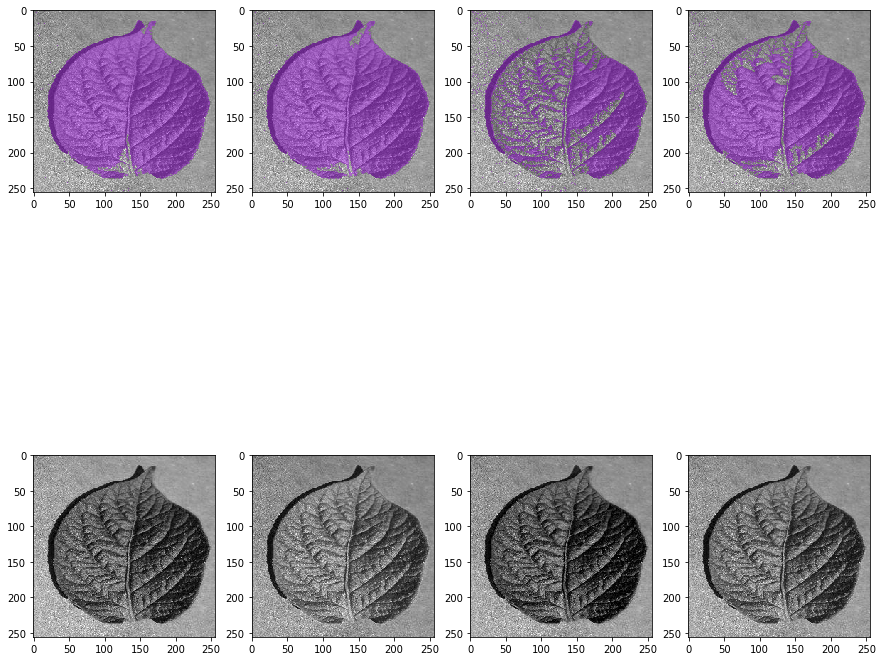

In [9]:
grayImage = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(testArrayGrayscale)),sitk.sitkUInt8)
overlay = {}

testArrays = {}
testArrays[0] = testArrayRed
testArrays[1] = testArrayGreen
testArrays[2] = testArrayBlue
testArrays[3] = testArrayGrayscale


# make matlab plots
plt.subplots(2,4,figsize=(15,15))

for i in range (0,4):
    hole2[i] = sitk.Cast(sitk.RescaleIntensity(hole2[i]),sitk.sitkUInt8)
    # Show the overlay of the targets (have to cast to Int)
    overlay[i] = sitk.LabelOverlay(grayImage,hole2[i])
    # overlay[i] = sitk.Cast(sitk.RescaleIntensity(overlay[i]),sitk.sitkVectorUInt8)
    plt.subplot(2,4,i+1)
    plt.imshow(sitk.GetArrayViewFromImage(overlay[i]),cmap='gray')

    
for i in range(4,8):
    plt.subplot(2,4,i+1);
    plt.imshow(testArrays[i-4],cmap='gray')
    
print("visualizing the answers! ")

There is 2 possible routes to go down now: 1) region growing after finding the centroid of the image 2) Otsu again after multiplying the images. I will trying region growing because there is still not a definite leaf, some parts are missing still 

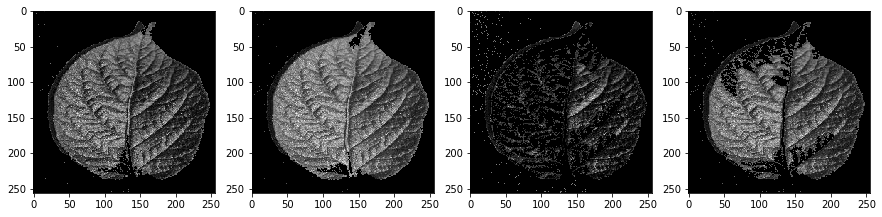

In [10]:
testArraysSeg1 = {}

# make matlab plots
plt.subplots(1,4,figsize=(15,15))

# show the image in terms of only the segemented area from the leaf so far 
for i in range(0,4):
    testArraysSeg1[i] = np.multiply(testArrays[i],sitk.GetArrayViewFromImage(hole2[i])/255)
    plt.subplot(1,4,i+1)
    plt.imshow(testArraysSeg1[i],cmap='gray')

Honestly this is a pretty good background removed version of the leaf (at least the green one in this case). I will create anothers script to try Background on a larger dataset.

In [11]:
myProp = {}
centroid = {}

# find the centroid to use as a starting position for the algorithm 
for i in range(0,4):
    myProp[i] = regionprops(sitk.GetArrayViewFromImage(hole2[i]))
    centroid[i] = np.array(myProp[i][0].local_centroid).astype(int)    
    print("centroid(x,y) = "+ str(centroid[i]))
    
# also a good idea to check out the other properties in region props, can be fed into our ML model as inputs? https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

centroid(x,y) = [135 132]
centroid(x,y) = [136 132]
centroid(x,y) = [138 148]
centroid(x,y) = [139 134]


D:\Anaconda\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


In [12]:
# Multiply original image by Red/ Green/ Blue / Grayscale segemenation from before
print(np.array(centroid[0]).astype(int))

[135 132]


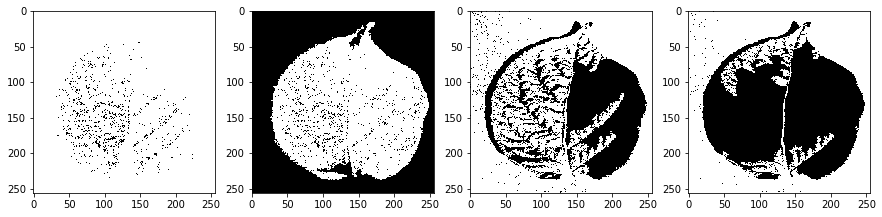

In [13]:
# perform region growing on the algorithm 
segLeaf = {}

# make matlab plots
plt.subplots(1,4,figsize=(15,15))

# try the region growing algorithm 
for i in range(0,4):
    segLeaf[i] = sitk.ConfidenceConnected(sitk.GetImageFromArray(testArraysSeg1[i]), seedList=[(135,132)],
                                    numberOfIterations=10,
                                    multiplier=2,
                                    initialNeighborhoodRadius=10,
                                    replaceValue=255)
    plt.subplot(1,4,i+1)
    plt.imshow(sitk.GetArrayViewFromImage(segLeaf[i]),cmap='gray')

This algorithm is very dependant on your seed points, and I can't find a reliable way to chose a good seed point in the leaf. I tried centroid but that doesn't seem to work. I might have to chose more seed points or do something else. For now I am moving on. Other note: green seems to be the best contrast and therefore the best image for this section of the image processing 

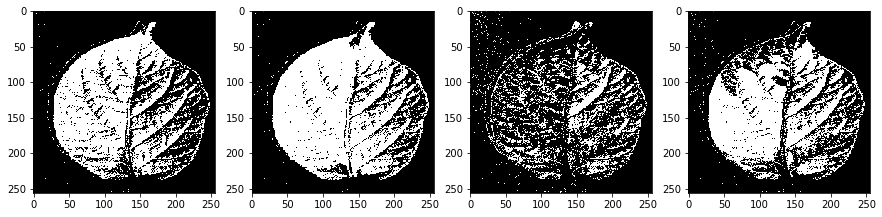

In [14]:
# lets try otsu filter again 

otsu_filter = sitk.OtsuThresholdImageFilter() 
inside_value = 0 #set inside values to 1 
outside_value = 255 #set outside values to 0 

# Pass the values to the otsu filter
otsu_filter.SetInsideValue(inside_value) 
otsu_filter.SetOutsideValue(outside_value)

otsu2 = {}
# try it on grayscale converted object 

# make matlab plots
plt.subplots(1,4,figsize=(15,15))
for i in range(0,4):
    otsu2[i] = otsu_filter.Execute(sitk.GetImageFromArray(testArraysSeg1[i]))
    plt.subplot(1,4,i+1)
    plt.imshow(sitk.GetArrayViewFromImage(otsu2[i]),cmap='gray')
    

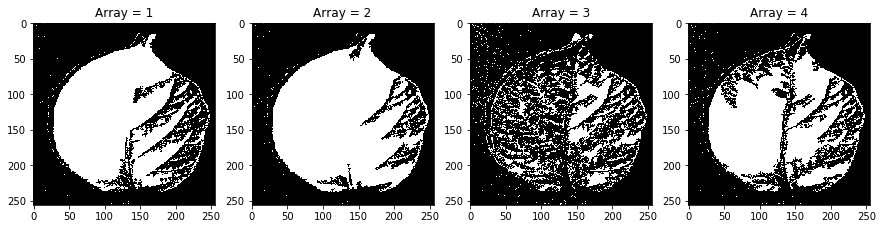

In [15]:
# use hole fill filter to try to get the image to binarize the leaf in it's entirety 
holeFillFilter = sitk.GrayscaleFillholeImageFilter()
holeFillFilter.FullyConnectedOff()

# make matlab plots
plt.subplots(1,4,figsize=(15,15))

hole3 = {}
for i in range (0,4):
    # try it on grayscale converted object 
    hole3[i] = holeFillFilter.Execute(otsu2[i])
    plt.subplot(1,4,i+1)
    plt.imshow(sitk.GetArrayViewFromImage(hole3[i]),cmap='gray')
    plt.title('Array = ' + str(i+1))

Not a terrible output on the green / red wavelengths! but I worry that this process won't work on ALL leaves. It kinda needs to be tested on a larger array of leaves!! 